Name: Simin Eskandari
SID: 810100240
AI CA5 Fall2024

# Overall view of the code:
    1-Connecting to Drive: Ensures persistent file access in Colab.

    2-Importing Libraries: Sets up tools for text processing, clustering, and visualization.

    3-Preprocessing: Cleans and standardizes text for better analysis.
    
    4-Clustering and Dimension Reduction: Extracts patterns and reduces complexity in data for effective visualization and interpretation.

## Connecting to my drive in order to use google colab:

In [10]:
from google.colab import drive
import os

GOOGLE_DRIVE_PATH = '/content/drive/MyDrive/AI/CA5'
drive.mount('/content/drive')
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
os.chdir(GOOGLE_DRIVE_PATH)
print(os.listdir('./'))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['dataset.csv', '.ipynb_checkpoints']


## Reading and downloading the needed files:
Downloads essential NLTK resources, confirming packages (stopwords, wordnet) are up-to-date.
Essential libraries for data processing are imported:

pandas for working with data tables.

nltk (Natural Language Toolkit) for text processing, including stopword removal and lemmatization.

sklearn for machine learning tools.

NLTK resources like stopwords and wordnet are downloaded for use in preprocessing tasks.


In [ ]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

df = pd.read_csv('dataset.csv')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


These libraries and resources are fundamental for handling natural language data, especially for tasks like:

Removing common, non-informative words (stopwords).

Standardizing words through stemming or lemmatization.

In [ ]:
texts = df['document']

def preprocess_text(text, method='stemming'):
    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = ''.join([char for char in text if not char.isdigit()])

    # converting the sentences into words(analyzing tokens)
    words = text.split()

    # Deleting duplicated words
    stop_words = set(stopwords.words('english')).union(set(ENGLISH_STOP_WORDS))
    words = [word for word in words if word not in stop_words]

    if method == 'stemming':
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]
    elif method == 'lemmatization':
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

     # joining words again in order to make more useable sentences
    return ' '.join(words)

df['processed_text_stemming'] = texts.apply(lambda x: preprocess_text(x, method='stemming'))

df['processed_text_lemmatization'] = texts.apply(lambda x: preprocess_text(x, method='lemmatization'))

df.to_csv('processed_dataset.csv', index=False)



## Final part:(Clustering Analysis)

Tools for clustering and evaluation are imported:
SentenceTransformer for transforming text data into vector representations.

Clustering algorithms:
    KMeans groups data into clusters based on distance from centroids.

    DBSCAN identifies clusters based on density and noise points.

    AgglomerativeClustering performs hierarchical clustering.

    silhouette_score measures the quality of clusters.

    matplotlib.pyplot for visualizing results.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/122 [00:00<?, ?it/s]

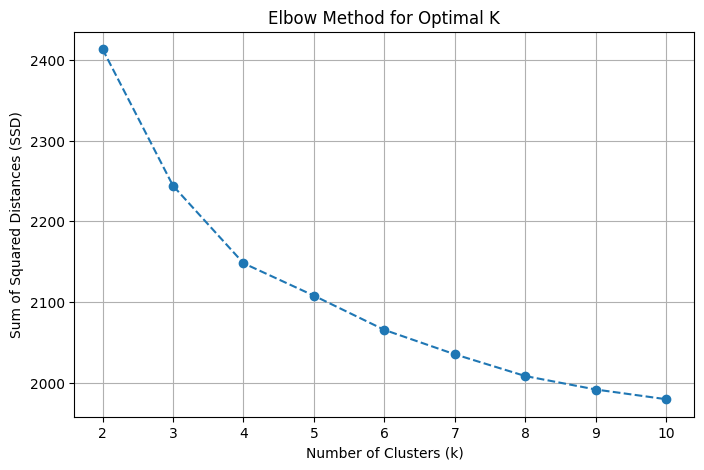

Silhouette Score for K-Means (k=5): 0.07392088323831558
Silhouette Score for DBSCAN: 0.3928369879722595
Silhouette Score for Hierarchical Clustering: 0.0676984116435051
Clustering results saved to clustering_results.csv


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = 'processed_dataset.csv'
data = pd.read_csv(file_path)

texts = data['processed_text_stemming']

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts.tolist(), show_progress_bar=True)

#  K-Means Clustering with Elbow Method
# Determine the optimal number of clusters (k)
ssd = []  # Sum of squared distances
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()

k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings)

silhouette_kmeans = silhouette_score(embeddings, kmeans_labels)
print(f'Silhouette Score for K-Means (k={k_optimal}): {silhouette_kmeans}')

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(embeddings)

if len(set(dbscan_labels)) > 1:  # Ensure at least 2 clusters exist
    silhouette_dbscan = silhouette_score(embeddings[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print("DBSCAN could not form enough clusters. Try adjusting parameters.")


hierarchical = AgglomerativeClustering(n_clusters=k_optimal, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(embeddings)

silhouette_hierarchical = silhouette_score(embeddings, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')

data['kmeans_labels'] = kmeans_labels
data['dbscan_labels'] = dbscan_labels
data['hierarchical_labels'] = hierarchical_labels
output_file_path = 'clustering_results.csv'
data.to_csv(output_file_path, index=False)
print(f'Clustering results saved to {output_file_path}')


Clustering is used to identify patterns or groupings in data. Different algorithms suit different types of data:

K-Means is efficient for well-separated clusters.

DBSCAN handles noise and irregular cluster shapes better.

Agglomerative clustering builds a hierarchy of clusters.

## dimention reduction:

Batches:   0%|          | 0/122 [00:00<?, ?it/s]

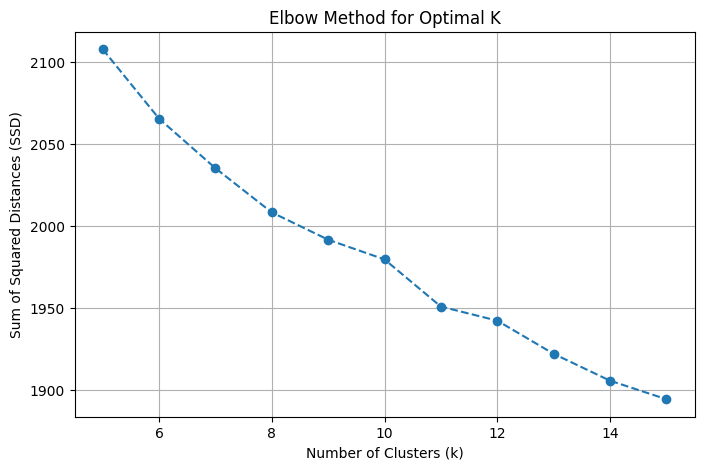

Silhouette Score for K-Means (k=10): 0.05482051149010658
Silhouette Score for DBSCAN: 0.3928369879722595
Silhouette Score for Hierarchical Clustering: 0.04044604301452637


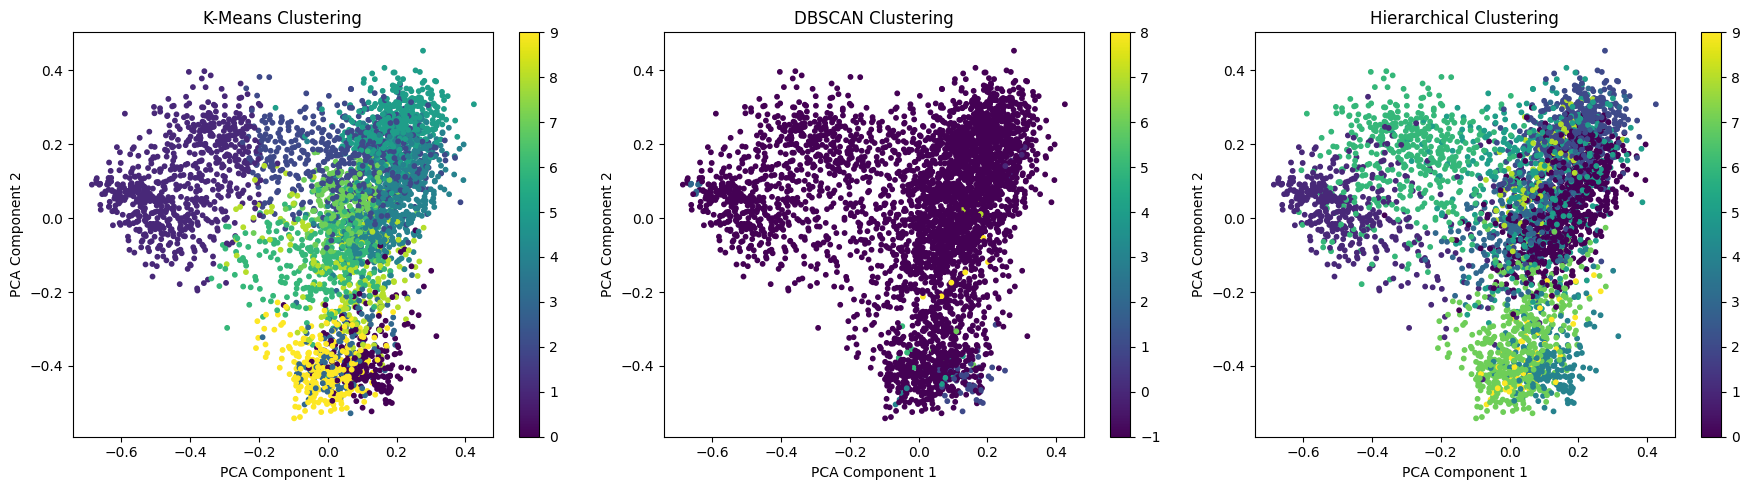

Clustering results saved to clustering_results.csv


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path = 'processed_dataset.csv'
data = pd.read_csv(file_path)

texts = data['processed_text_stemming']

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts.tolist(), show_progress_bar=True)

ssd = []
k_values = range(5, 16)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, ssd, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()

k_optimal = 10
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_labels = kmeans.fit_predict(embeddings)

silhouette_kmeans = silhouette_score(embeddings, kmeans_labels)
print(f'Silhouette Score for K-Means (k={k_optimal}): {silhouette_kmeans}')

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(embeddings)

# Evaluate DBSCAN clustering (ignore noise points with label -1)
if len(set(dbscan_labels)) > 1:  # Ensure at least 2 clusters exist
    silhouette_dbscan = silhouette_score(embeddings[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print("DBSCAN could not form enough clusters. Try adjusting parameters.")

hierarchical = AgglomerativeClustering(n_clusters=k_optimal, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(embeddings)

silhouette_hierarchical = silhouette_score(embeddings, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=hierarchical_labels, cmap='viridis', s=10)
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

data['kmeans_labels'] = kmeans_labels
data['dbscan_labels'] = dbscan_labels
data['hierarchical_labels'] = hierarchical_labels
output_file_path = 'clustering_results.csv'
data.to_csv(output_file_path, index=False)
print(f'Clustering results saved to {output_file_path}')
